In [89]:
import praw
user_agent = 'Reddit_Scrapper 1.0 by /u/Active_Break9385'
reddit = praw.Reddit(
 client_id='NA59w4_hCCHW0tjzde1Alg',
 client_secret='lDpXKHai-zypU6_fs1KB9c0oiQmF5g',
 user_agent=user_agent
)

In [90]:
import pandas as pd
import numpy as np
import re

In [91]:
# Create an empty list to store each row
comments_data = []

subreddit = reddit.subreddit("jerseycity+northjersey+hudsoncounty")  # Change to your subreddit of choice
for submission in subreddit.new(limit=None):  # You can change the limit
    submission.comments.replace_more(limit=0)  # To flatten comment tree and remove 'MoreComments' objects
    for comment in submission.comments.list():
        comments_data.append({
            'Post_ID': submission.id,
            'Post_Title': submission.title,
            'Comment_ID': comment.id,
            'Comment_Body': comment.body,
            'Comment_Author': str(comment.author),
            'Score': comment.score,
            'Created': comment.created_utc
        })

comments_df = pd.DataFrame(comments_data)
comments_df.head()




KeyboardInterrupt: 

In [ ]:
subject = "mussab"
# Filter comments containing the subject (case-insensitive)
filtered_df = comments_df[comments_df['Comment_Body'].str.lower().str.contains(subject.lower())]
filtered_df.head()

,Post_ID,Post_Title,Comment_ID,Comment_Body,Comment_Author,Score,Created


In [ ]:
import re

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)            # Remove mentions
    text = re.sub(r'https?:\/\/\S+', '', text)            # Remove URLs
    text = re.sub(r'#', '', text)                         # Remove hashtag symbol
    text = re.sub(r'\n', ' ', text)                       # Remove newlines
    text = re.sub(r':', '', text)                         # Remove colons
    return text

filtered_df['Clean_Comment'] = filtered_df['Comment_Body'].apply(clean_text)


In [ ]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_category(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

filtered_df['Subjectivity'] = filtered_df['Clean_Comment'].apply(get_subjectivity)
filtered_df['Polarity'] = filtered_df['Clean_Comment'].apply(get_polarity)
filtered_df['Sentiment'] = filtered_df['Polarity'].apply(get_sentiment_category)

filtered_df.head()


,Post_ID,Post_Title,Comment_ID,Comment_Body,Comment_Author,Score,Created,Clean_Comment,Subjectivity,Polarity,Sentiment


IndexError: index 0 is out of bounds for axis 0 with size 0

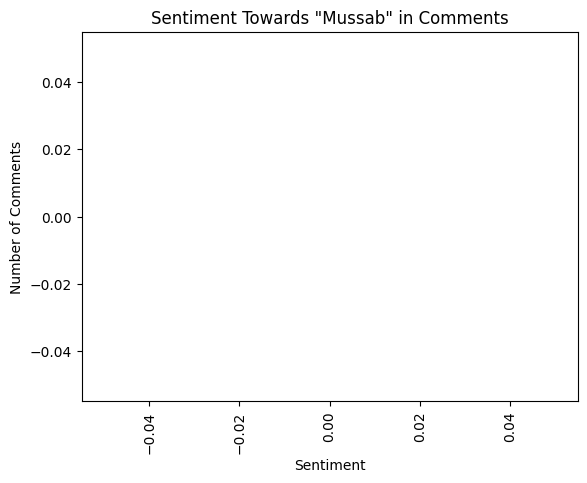

In [ ]:
import matplotlib.pyplot as plt

plt.title(f'Sentiment Towards "{subject.capitalize()}" in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
filtered_df['Sentiment'].value_counts().plot(kind='bar', color='#2078B4')
plt.show()
